In [1]:
using LinearAlgebra
using Random
using CairoMakie
using Distances
CairoMakie.activate!(type = "svg")

In [2]:
using StatsBase

In [4]:
N = 8
μ = rand(N,2)
x,y  = μ[:,1], μ[:,2]

([0.1359358904252388, 0.09189272870382958, 0.9433139102430184, 0.06867207316721724, 0.413659809245859, 0.25429079047724157, 0.09598122289714972, 0.003876713859762182], [0.6925288178746507, 0.7341564249727428, 0.8286426412906815, 0.8963470859449885, 0.10646053713918846, 0.7143042561367434, 0.173021586550685, 0.7158423516605583])

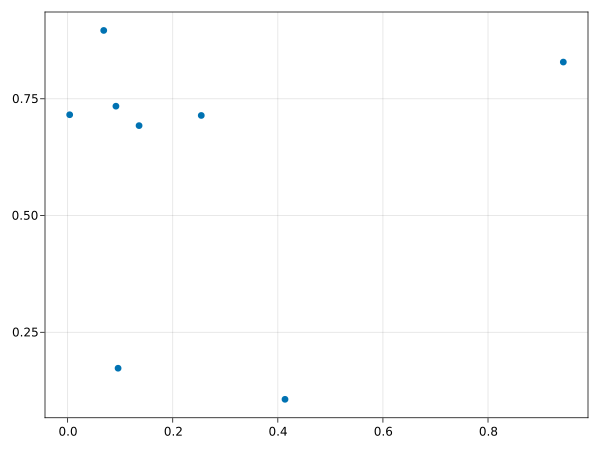

In [5]:
scatter(μ)

In [ ]:
function basecase(xsorted)
    
end

In [ ]:
def dist(p1, p2):
    return math.sqrt(((p2[1]-p1[1])**2)+((p2[0]-p1[0])**2))

def closest_brute_force(points):
    min_dist = float("inf")
    p1 = None
    p2 = None
    for i in range(len(points)):
        for j in range(i+1, len(points)):
            d = dist(points[i], points[j])
            if d < min_dist:
                min_dist = d
                p1 = points[i]
                p2 = points[j]
    return p1, p2, min_dist


def rec(xsorted, ysorted):
    n = len(xsorted)
    if n <= 3:
        return closest_brute_force(xsorted)
    else:
        midpoint = xsorted[n//2]
        xsorted_left = xsorted[:n//2]
        xsorted_right = xsorted[n//2:]
        ysorted_left = []
        ysorted_right = []
        for point in ysorted:
            ysorted_left.append(point) if (point[0] <= midpoint[0]) else ysorted_right.append(point)
        (p1_left, p2_left, delta_left) = rec(xsorted_left, ysorted_left)
        (p1_right, p2_right, delta_right) = rec(xsorted_right, ysorted_right)
        (p1, p2, delta) = (p1_left, p2_left, delta_left) if (delta_left < delta_right) else (p1_right, p2_right, delta_right)
        in_band = [point for point in ysorted if midpoint[0]-delta < point[0] < midpoint[0]+delta]
        for i in range(len(in_band)):
            for j in range(i+1, min(i+7, len(in_band))):
                d = dist(in_band[i], in_band[j])
                if d < delta:
                    print(in_band[i], in_band[j])
                    (p1, p2, delta) = (in_band[i], in_band[j], d)
        return p1, p2, delta


def closest(points):
    xsorted = sorted(points, key=lambda point: point[0])
    ysorted = sorted(points, key=lambda point: point[1])
    return rec(xsorted, ysorted)